# **Важно!**

* Домашнее задание состоит из нескольких задач, которые вам нужно решить.
*   Баллы выставляются по принципу «выполнено/невыполнено».
*   За каждую выполненную задачу вы получаете баллы (количество баллов за задание указано в скобках).

**Инструкция:** выполните задания в этом же ноутбуке (места под решения **каждой** задачи обозначаются как **#НАЧАЛО ВАШЕГО РЕШЕНИЯ** и **#КОНЕЦ ВАШЕГО РЕШЕНИЯ**).

**Как отправить задание на проверку:** вам необходимо сохранить решение в данном блокноте и отправить итоговый **файл .IPYNB** на учебной платформе в **стандартную форму сдачи домашнего задания.**

**Сроки проверки:** преподаватель проверит домашнее задание в течение недели после дедлайна и даст вам обратную связь.

# **Перед выполнением задания**

1. **Перезапустите ядро (restart the kernel):** в меню выбрать **Ядро (Kernel)**
→ **Перезапустить (Restart).**
2. **Выполните** **все ячейки (run all cells)**: в меню выбрать **Ячейка (Cell)**
→ **Запустить все (Run All)**.

После ячеек с заданием следуют ячейки с проверкой **с помощью assert**: если в коде есть ошибки, assert выведет уведомление об ошибке; если в коде нет ошибок, assert отработает без вывода дополнительной информации.

---

# Домашнее задание 2. Процесс разработки проекта машинного обучения. Подготовка данных. Оценка качества алгоритмов обучения с учителем. Метод ближайших соседей

**Что вас ждет**

В этом задании мы начнем осваивать библиотеку pandas по работе с данными, проведем стандартную процедуру подготовки и визуализации данных для обучения, обучим алгоритм ближайших соседей (KNN). Сначала мы проведем обучение вручную, чтобы понять, как работает алгоритм KNN изнутри, какие шаги выполняются при классификации. Затем сравним результаты с готовым решением из библиотеки `scikit-learn`.

In [1]:
# Запустите эту ячейку для первоначальной настройки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rc('lines', linewidth=2)

## Данные

Для демонстрации работы метода ближайших соседей мы воспользуемся датасетом Iris. Это классический набор данных со 150 образцами ирисов, разделенными на три класса: ирис щетинистый (Iris setosa), ирис виргинский (Iris virginica) и ирис разноцветный (Iris versicolor). Каждый образец имеет 4 признака: длина и ширина чашелистика и лепестка.

Эти данные идеально подходят для знакомства с KNN, так как имеют небольшой размер и легко воспринимаются. Датасет легко разделить на 3 класса, а набор данных можно визуализировать в 2D.

## Загрузка данных

Широко используемые датасеты можно загрузить с помощью таких библиотек, как `sklearn`. В реальных же ситуациях мы обычно имеем дело с данными в формате таблицы или файла `.csv` (*commа separated values*).

In [2]:
# Загрузка набора данных Iris
iris_data = pd.read_csv("Lecture_02_assignments_2024_data.csv", sep=',')
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Наши данные состоят из четырех признаков с названиями `sepal.length`, `sepal.width`, `petal.length` и `petal.width`. Последняя колонка соответствует классу ирисов (`variety`).

Обратите внимание на тип данных (`Dtype`). Признаки задаются числом с плавающей точкой (`float64`) в то время как классы заданы данными типа `object`. Этот тип обычно используется для представления строк или смешанных типов данных. Посмотрим, с какими именно классами мы работаем, с помощью метода `df.unique()`:

In [3]:
print(iris_data['variety'].unique())

['Setosa' 'Versicolor' 'Virginica']


In [4]:
# Проверим первые несколько строк наших данных
print(iris_data.head())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


## Разделение признаков и целевой переменной

Следующим шагом мы разделим данные на признаки и целевую переменную. Для наглядности и простоты визуализации используем только два признака: `sepal.length` и `sepal.width`.

Операция `df['column']` в pandas называется индексацией (indexing) и используется для извлечения одного или нескольких столбцов из DataFrame. Эта операция позволяет получить Series, соответствующий одному столбцу DataFrame. Если необходимо выбрать несколько столбцов, то следует передать список с именами столбцов в квадратных скобках, например: `df[['column1', 'column2']]`.

**Задание 1 (1 балл)**

Примените индексацию к `iris_data`, чтобы получить DataFrame с признаками `iris_values` и Series с целевой переменной `iris_target`.

In [5]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
iris_values = iris_data[["sepal.length", "sepal.width"]]

iris_target = iris_data["variety"]
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [6]:
# Проверка индексации. Просто запустите ячейку.
assert iris_values.shape == (150, 2)
assert iris_target.shape == (150,)

## Кодирование категориальных меток

Чтобы обучить модель, нужно перевести текстовые значения классов в численные. Это можно сделать с помощью функции `pd.factorize()`.

In [7]:
# Кодирование текстовых меток целевой переменной
iris_target_encoded, class_names = pd.factorize(iris_target)

print("Закодированные категориальные данные:")
print(iris_target_encoded)
print("Названия классов: ")
print(", ".join(class_names.tolist()))

Закодированные категориальные данные:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Названия классов: 
Setosa, Versicolor, Virginica


## Визуализация данных

Визуализация данных играет ключевую роль в анализе и интерпретации информации. Она помогает нам быстро выявить закономерности, распределения, взаимосвязи и аномалии, которые могут быть неочевидны при простом просмотре статистических данных.

**Задание 2 (2 балла)**

Постройте рассеянный график по двум переменным: `iris_values['sepal.length']` и `iris_values['sepal.width']`. При построении графика рассеяния воспользуйтесь `plt.scatter` с дополнительным параметром `c=iris_target_encoded` для отображения цветов в соответствии с классом. Подпишите оси Sepal Length и Sepal Width. Озаглавьте график «Данные Iris». Выведите график при помощи команды `plt.show(`).

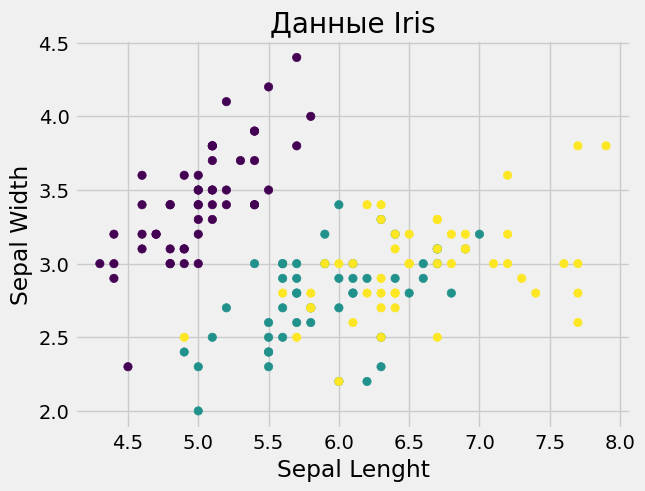

In [8]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
plt.title("Данные Iris")

plt.scatter(x=iris_values["sepal.length"], y=iris_values["sepal.width"], c=iris_target_encoded)

plt.xlabel("Sepal Lenght")
plt.ylabel("Sepal Width")

plt.show()
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

Как мы видим, данные уже неплохо разделяются по двум признакам из четырех.

## Нормализация данных

Цель нормализации — привести признаки к общему масштабу, чтобы все они одинаково вносили вклад в вычисления, а модель не была предвзята в пользу признаков с большими значениями. Это особенно важно, когда разные признаки имеют разные единицы измерения или сильно отличаются по порядку величины. В случае с Iris без нормализации длина чашелистика `sepal.length` вносила бы на порядок больший вклад по сравнению с шириной лепестков `petal.width`.


In [9]:
from sklearn.preprocessing import StandardScaler

# Нормализация(Стандартизация) данных
scaler = StandardScaler()
iris_values_scaled = scaler.fit_transform(iris_values)

Посмотрим, как изменились распределения данных до и после стандартизации. Обратите внимание, что StandardScaler преобразовал данные из DataFrame в np.array, поэтому мы будем пользоваться разными способами обращения с данными до и после нормировки.


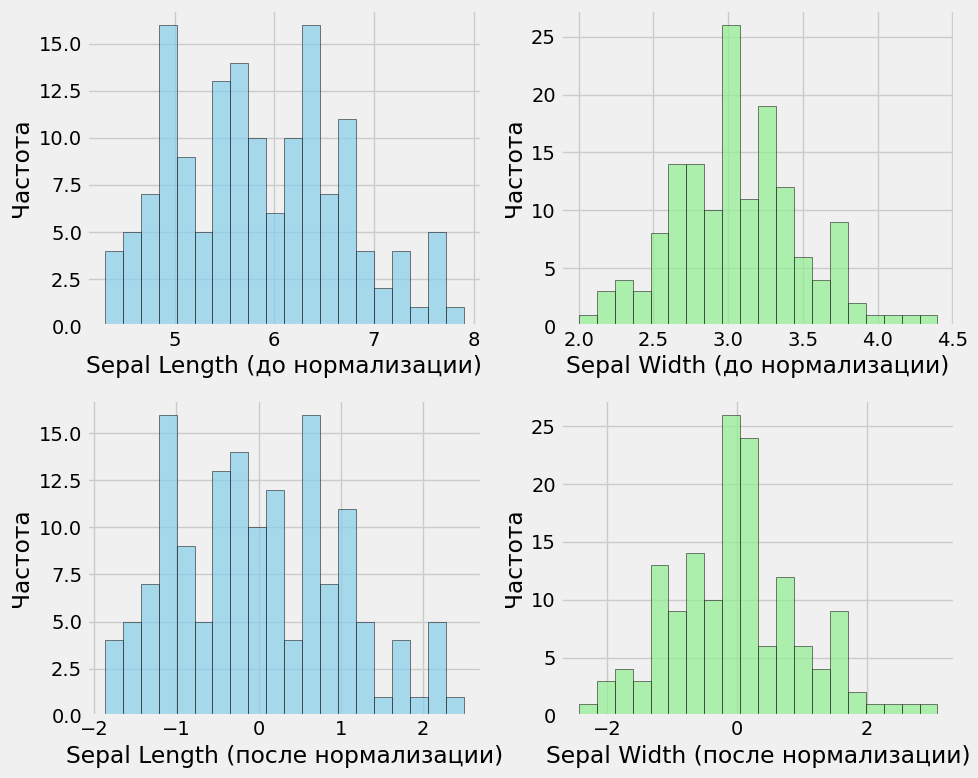

In [10]:
plt.figure(figsize=(10, 8))

# Графики распределений до стандартизации
plt.subplot(2, 2, 1)
plt.hist(iris_values['sepal.length'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Sepal Length (до нормализации)')
plt.ylabel('Частота')

plt.subplot(2, 2, 2)
plt.hist(iris_values['sepal.width'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.xlabel('Sepal Width (до нормализации)')
plt.ylabel('Частота')

# Графики распределений после стандартизации
plt.subplot(2, 2, 3)
plt.hist(iris_values_scaled[:, 0], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Sepal Length (после нормализации)')
plt.ylabel('Частота')

plt.subplot(2, 2, 4)
plt.hist(iris_values_scaled[:, 1], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.xlabel('Sepal Width (после нормализации)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Заметьте, что после стандартизации значения признаков лежат примерно в одном диапазоне.

## Разбивка на обучающую и тестовую выборки

Наши данные готовы к заключительной фазе обработки: разделению данных на обучающую и тестовую выборки. Для этой цели мы воспользуемся функцией train_test_split из библиотеки sklearn.

**Задание 3 (1 балл)**

Разбейте исходные данные на обучающую и тестовую выборки, отложив под тест 30% данных:

`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)`

In [11]:
from sklearn.model_selection import train_test_split

# Фиксация генератор случайных чисел для воспроизводимости экспериментов
np.random.seed(21)

X_train, X_test, y_train, y_test = train_test_split(
    # НАЧАЛО ВАШЕГО РЕШЕНИЯ
    iris_values_scaled, iris_target_encoded, test_size=0.3
    # КОНЕЦ ВАШЕГО РЕШЕНИЯ
    )

In [12]:
# Проверка разбивки. Просто запустите ячейку.
assert X_train.shape == (105, 2)
assert X_test.shape == (45, 2)
assert y_train.shape == (105,)
assert y_test.shape == (45,)

# Обучение модели вручную

Попробуем вручную обучить модель ближайших соседей. Для этого нам понадобится вспомогательная функция расчета расстояния.

**Задание 4 (1 балл)**

Запишите функцию для вычисления евклидова расстояния между двумя точками. Вы можете пользоваться такими функциями из NumPy, как `np.sqrt` и `np.sum`.

In [13]:
def euclidean_distance(point1, point2):
    # НАЧАЛО ВАШЕГО РЕШЕНИЯ
    distance = np.sqrt(np.sum((point1 - point2)**2))
    # КОНЕЦ ВАШЕГО РЕШЕНИЯ
    return distance

In [14]:
assert euclidean_distance(np.array([0,0]), np.array([3,4])) == 5.0
assert euclidean_distance(np.array([1,1]), np.array([1,1])) == 0.0

**Задание 5 (3 балла)**

Реализуйте алгоритм k-ближайших соседей вручную. Напомним, что наша цель — рассчитать значение целевой переменной в точке как среднее по значениям k-ближайших соседей. Для этого нужно для каждой точки из тестовой выборки рассчитать расстояния до всех точек из обучающей выборки `X_train`, используя функцию `euclidean_distance`. Результатом будет список расстояний, показывающий, насколько близка каждая точка из `X_train` к текущей `test_point`.

Нужно отсортировать этот список в порядке удаления от выбранной точки при помощи команды np.argsort и оставить k-ближайших соседей. Затем найти целевые значения, соответствующие этим индексам, и рассчитать среднее значение целевой переменной. Оно и будет предсказанием для данной тестовой точки.

У вас должен получиться алгоритм вида:

```
предсказания=[]
цикл по точкам из тестовой выборки:
    расстояния=[]
    цикл по точкам из обучающей выборки:
        рассчитать расстояние
        расстояния.append(расстояние)
    сортировка индексов np.argsort
    оставить ближайшие k соседей
    найти их значения y
    рассчитать среднее значение y по k и округлить его (1.66 -> 2)
    добавить его в список предсказаний

```




In [15]:
# Реализация KNN
def knn_predict(X_train, y_train, X_test, k):
    # НАЧАЛО ВАШЕГО РЕШЕНИЯ
    predictions=[]
    for i in range(len(X_test)):
        distances = [euclidean_distance(X_test[i], x_train) for x_train in X_train]
        classes = [y_train[i] for i in np.argsort(distances)[:k]]
        predictions.append(np.round(np.mean(classes)))
    # КОНЕЦ ВАШЕГО РЕШЕНИЯ

    return np.array(predictions)

In [16]:
assert knn_predict([1, 3, 5, 7, 9], [0, 0, 0, 1, 1], [2], 1) == 0
assert knn_predict([1, 3, 5, 7, 9], [0, 0, 0, 1, 1], [4], 1) == 0
assert knn_predict([1, 3, 5, 7, 9], [0, 0, 0, 1, 1], [8], 1) == 1

**Задание 6 (1 балл)**

Реализуйте расчет наиболее популярных метрик оценки качества задач классификации: Accuracy, Precision и Recall. Дополните код, пользуясь формулами для расчета метрик.

In [17]:
def classification_metrics(y_test, y_pred):
    # Подсчет количества истинных положительных (TP), ложных положительных (FP), ложных отрицательных (FN)
    TP = FP = FN = 0

    # Примерные подсчеты для многоклассовой задачи
    for true, pred in zip(y_test, y_pred):
        if true == pred:
            TP += 1  # Истинно положительный (правильная классификация)
        else:
            FP += 1  # Ложно положительный (ошибочная классификация)
            FN += 1  # Ложно отрицательный (классификация как другой класс)

    # НАЧАЛО ВАШЕГО РЕШЕНИЯ
    accuracy = TP / len(y_pred)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    # КОНЕЦ ВАШЕГО РЕШЕНИЯ

    return accuracy, precision, recall

Теперь соберем все функции, чтобы обучить модель и посмотреть, как значение гиперпараметра k влияет на качество предсказаний.

**Задание 7 (1 балл)**

Дополните код, добавив две строчки: одну для вычисления предсказаний, вторую для вычисления значений метрик точности (Accuracy, Precition, Recall).

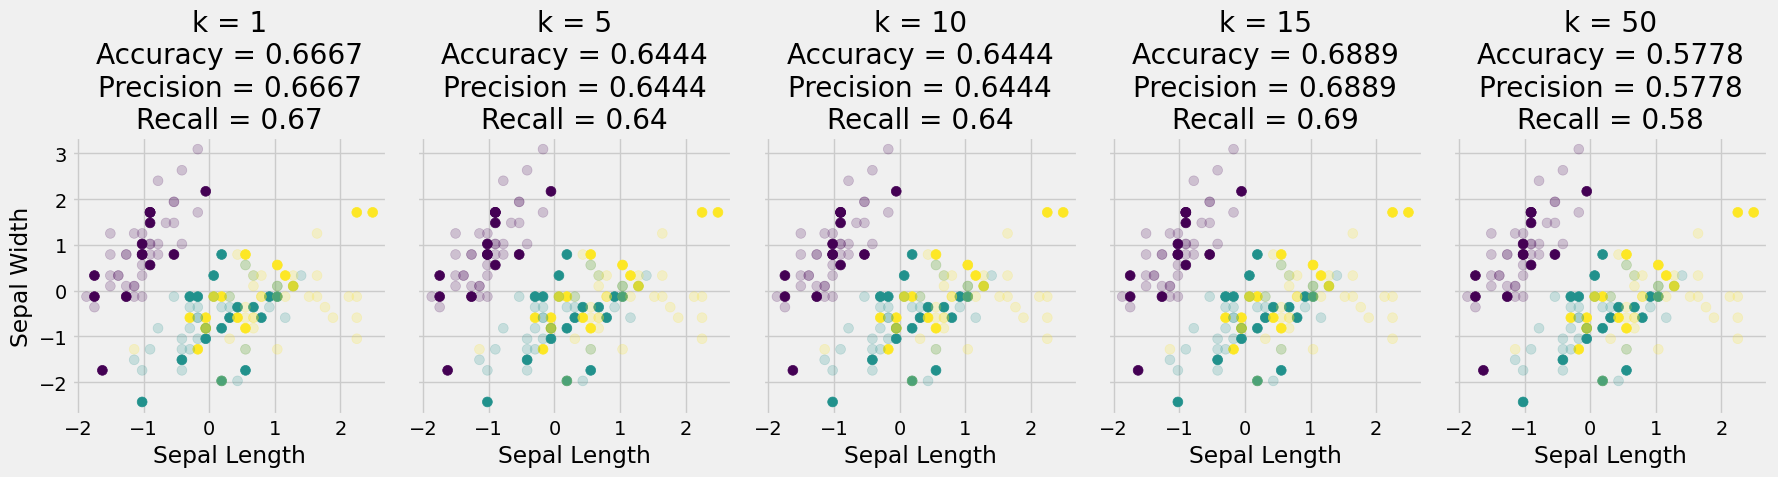

In [18]:
from sklearn.metrics import accuracy_score

# Диапазон значений k, которые мы будем тестировать
k_values = [1, 5, 10, 15, 50]


# Создаем фигуру и оси для графиков
fig, axes = plt.subplots(1, len(k_values), figsize=(18, 5), sharey=True)

for i, k in enumerate(k_values):
    # НАЧАЛО ВАШЕГО РЕШЕНИЯ
    y_pred = knn_predict(X_train, y_train, X_test, k)
    accuracy, precision, recall = classification_metrics(y_test, y_pred)
    # КОНЕЦ ВАШЕГО РЕШЕНИЯ

    # График, иллюстрирующий результаты при данном k
    axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50)
    axes[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.2, s=50)
    axes[i].set_title(f"k = {k}\nAccuracy = {accuracy:.4f}\nPrecision = {precision:.4f}\nRecall = {recall:.2f}")
    axes[i].set_xlabel("Sepal Length")

axes[0].set_ylabel("Sepal Width")
plt.tight_layout()
plt.show()

На графиках полупрозрачные точки соответствуют обучающим данным, яркие точки – тестовым. Видно, что в данном случае лучше всего алгоритм предсказывает классы при k=5 и 15. Заметьте, что и в случае k=1, то есть когда класс точки присваивается в соответствии с классом ближайшего соседа, метод относительно неплохо справляется с предсказанием. В случае больших значений k мы теряем детальную информацию о границах, необходимую для аккуратного разделения классов.

# Обучение модели с помощью готовой библиотеки

Теперь, когда мы решили задачу ближайших соседей вручную, давайте посмотрим, как можно сделать это при помощи готовых библиотек. Пользование библиотеками не только упрощает код, но и оптимизирует вычисления.

Мы воспользуемся функцией `KNeighborsRegressor` из библиотеки `scikit-learn`.


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Создаем экземпляр класса KNN-классификатора
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = knn.predict(X_test)

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Accuracy (точность): {accuracy:.2f}")
print(f"Precision (точность предсказания): {precision:.2f}")
print(f"Recall (полнота): {recall:.2f}")

Accuracy (точность): 0.67
Precision (точность предсказания): 0.69
Recall (полнота): 0.67


Как видите, мы получили сравнимые результаты ценой гораздо более компактного кода.

# Поздравляем!
В этом домашнем задании вы освоили основы работы с данными формата pandas и NumPy, углубили навыки построения графиков с помощью Matplotlib, написали целый алгоритм, реализовывали алгоритм KNN вручную и с помощью библиотеки sklearn.